In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("netflix.csv")  # <-- point to a real .csv file
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,23-03-2023,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,05-01-2023,"66,51,00,000",English,Show
2,The Glory: Season 1 // ë” ê¸€ë¡œë¦¬: ì‹œì¦Œ 1,Yes,30-12-2022,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,23-11-2022,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,04-05-2023,"50,30,00,000",English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,30-07-2019,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,26-07-2022,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,28-09-2020,"1,00,000",English,Movie


In [3]:
# Clean columns
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Hours Viewed'] = df['Hours Viewed'].str.replace(",", "")
df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'], errors='coerce')
df = df.drop_duplicates()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\994114117.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\599159765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Release Date'].dt.year
C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\599159765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Release Date'].dt.month
C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\599159765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

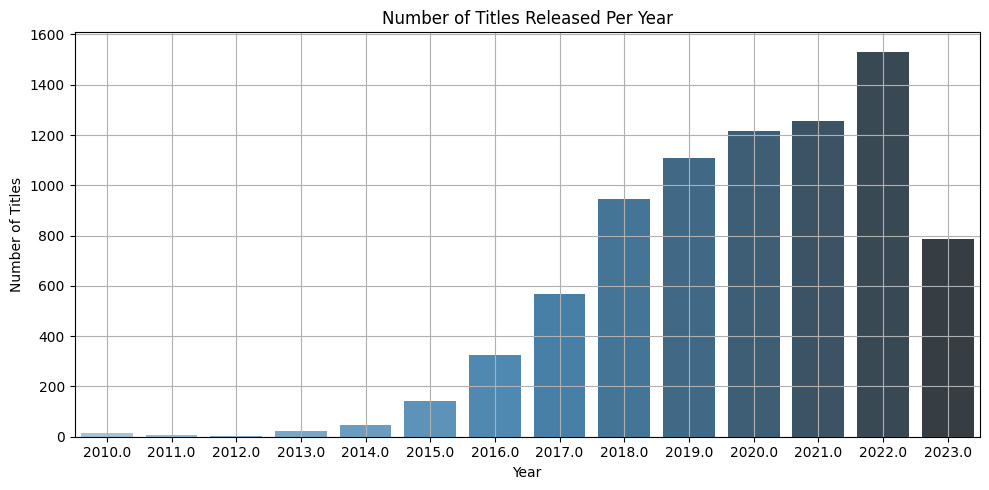

In [4]:
# Create Year and Month columns
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
titles_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=titles_per_year.index, y=titles_per_year.values, palette='Blues_d')
plt.title("Number of Titles Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

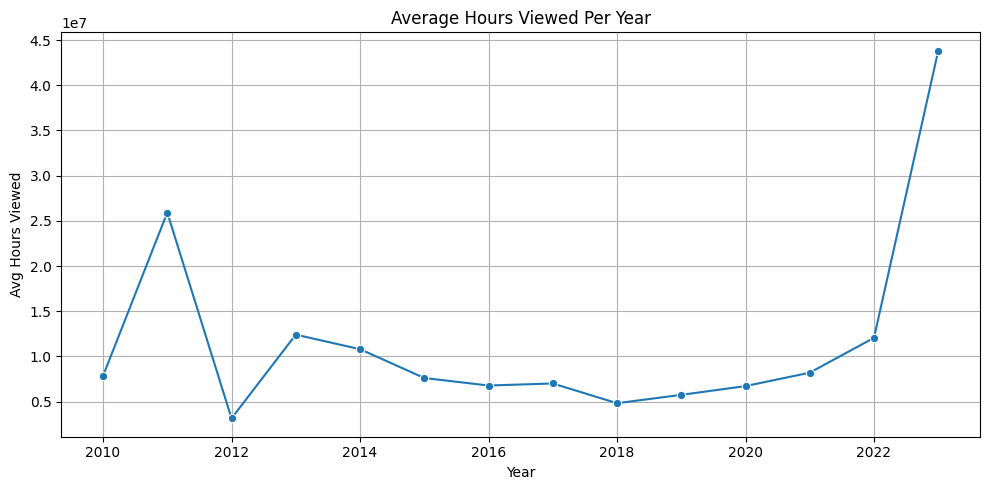

In [5]:
avg_hours_year = df.groupby('Year')['Hours Viewed'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_hours_year.index, y=avg_hours_year.values, marker='o')
plt.title("Average Hours Viewed Per Year")
plt.xlabel("Year")
plt.ylabel("Avg Hours Viewed")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\1411078131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content Type', palette='Set2')


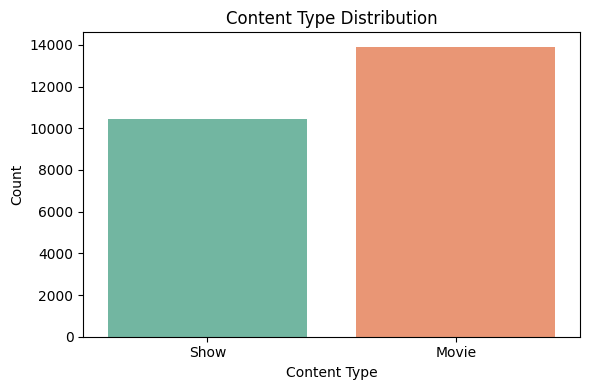

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Content Type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\2271383208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='pastel')


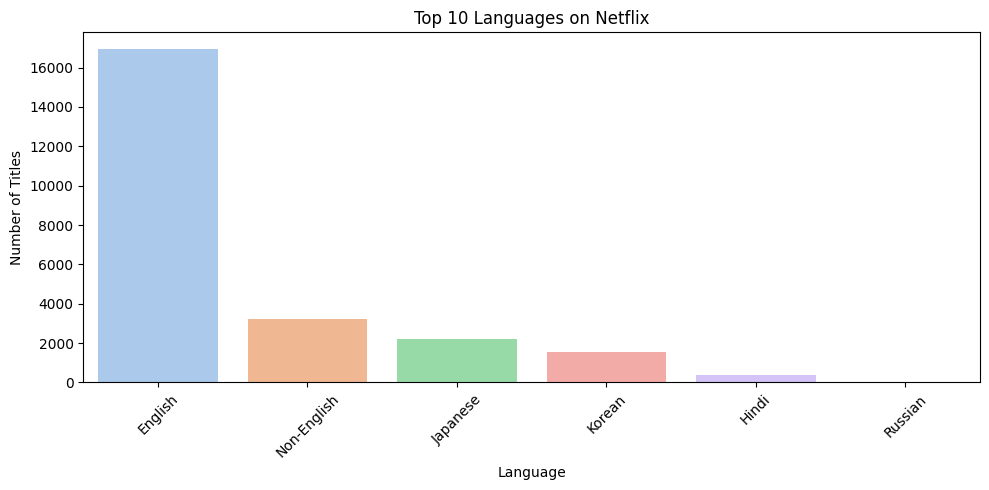

In [7]:
top_languages = df['Language Indicator'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_languages.index, y=top_languages.values, palette='pastel')
plt.title('Top 10 Languages on Netflix')
plt.xlabel('Language')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\3295810873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_viewed['Title'], x=top_viewed['Hours Viewed'], palette='rocket')
C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\3295810873.py:7: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kmmd4\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


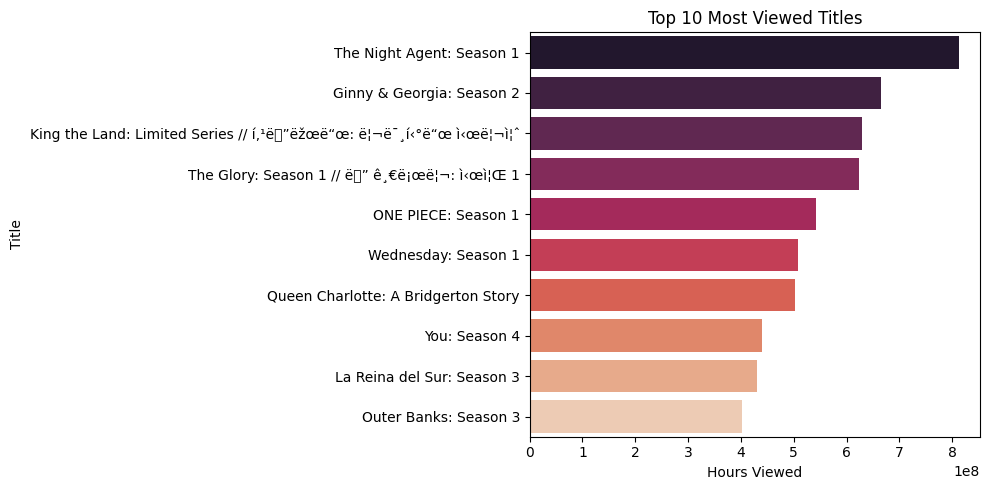

In [8]:
top_viewed = df[['Title', 'Hours Viewed']].dropna().sort_values('Hours Viewed', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_viewed['Title'], x=top_viewed['Hours Viewed'], palette='rocket')
plt.title("Top 10 Most Viewed Titles")
plt.xlabel("Hours Viewed")
plt.ylabel("Title")
plt.tight_layout()
plt.show()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\2228606219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=views_by_type.index, y=views_by_type.values, palette='cool')


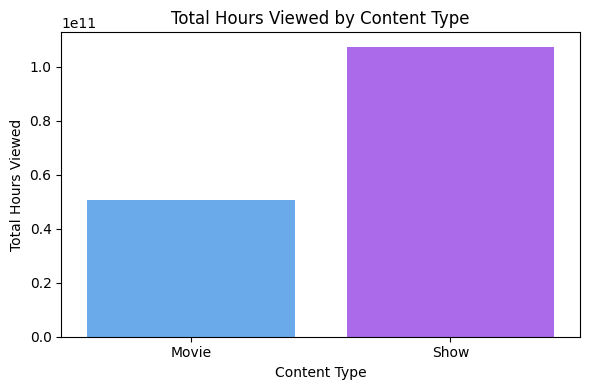

In [9]:
views_by_type = df.groupby('Content Type')['Hours Viewed'].sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=views_by_type.index, y=views_by_type.values, palette='cool')
plt.title("Total Hours Viewed by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Total Hours Viewed")
plt.tight_layout()
plt.show()

C:\Users\kmmd4\AppData\Local\Temp\ipykernel_13244\1343576057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=views_by_lang.index, y=views_by_lang.values, palette='viridis')


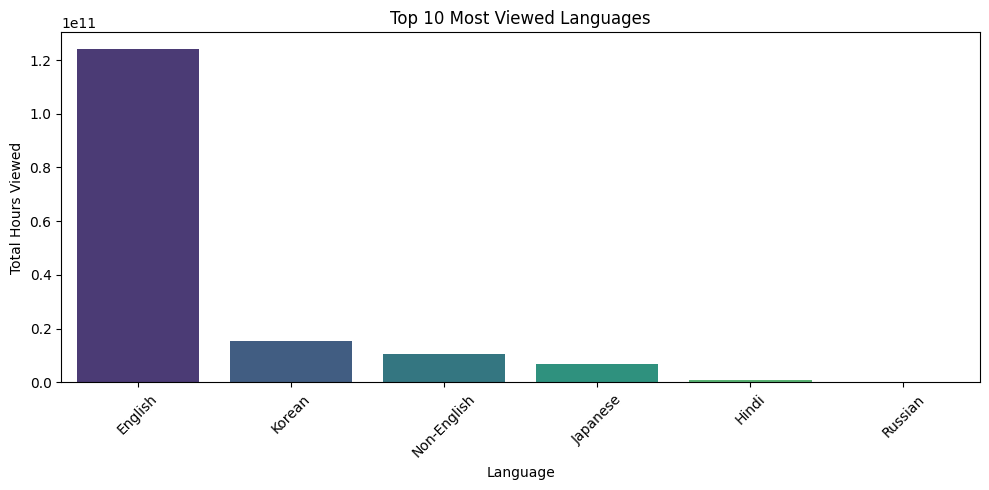

In [10]:
views_by_lang = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=views_by_lang.index, y=views_by_lang.values, palette='viridis')
plt.title("Top 10 Most Viewed Languages")
plt.xlabel("Language")
plt.ylabel("Total Hours Viewed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

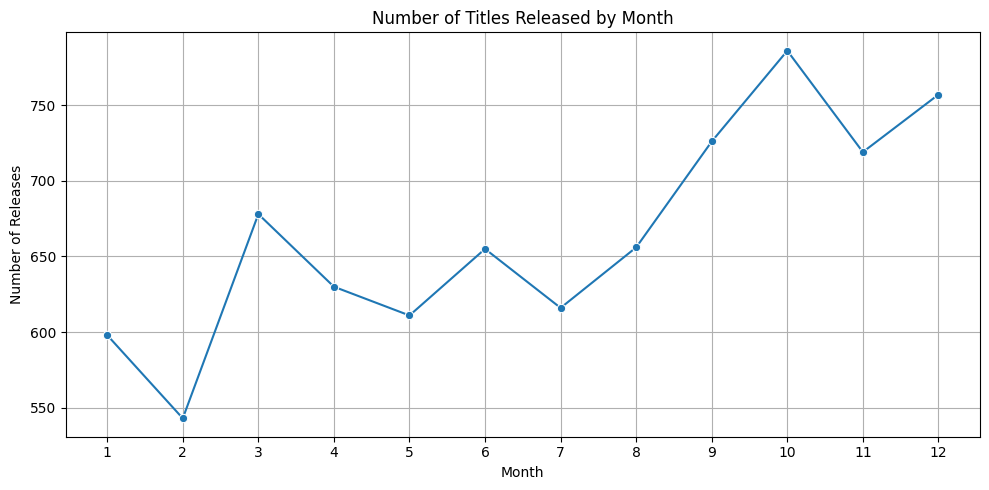

In [11]:
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Number of Titles Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

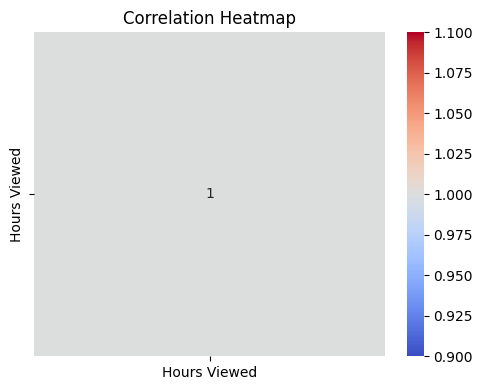

In [12]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['Hours Viewed']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()